#### MechaRela Numerical Simulation - Exercise 5

## pendulum with a spring
We have discussed both the pendulum and the mass-spring as separate cases. The could be solved analytically (in the case of the pendulum for small angles). What if we combine the two? That is: the rod of the pendulum is replaced by a spring? As we will see below, the problem becomes two-dimensional and is a lot more difficult to solve. However, we can set up the model without too much difficulty. Subsequently, we will solve it numerically. It turns out, that although the problem is two-dimensional, a numerical approach is not much more difficult than for the pendulum or spring itself.

### mass-spring
First, we will consider a mass $m$, suspended on a spring (rest length $l_0$ en spring constant $k$). The spring is at a fixed position at one end, while the mass $m$ is attached at the other end. $m$ is displaced by an amount $\Delta x$ and then released without initial velocity.
Take the following parameters:
$l_0 = 20cm$, $m = 0.1 kg$, $k = 10.0 N/m$, $\Delta x = 2cm$

Set up the analysis of this problem. It can be solved analytically.
<ul>
    <li>Make a sketch</li>
    <li>Set up a model</li>
    <li>Solve the model</li>
    <li>Show that energy is conserved: the sum of kinetic and potential energy is constant.</li>
    <li>Make a python programme that outputs a plot of the kinetic, potential and total energy as a function of time.</li>
</ul>

Think carefully about the time step to take. It should be significantly smaller than the period of the oscillation.

### swinging mass-spring
Now we will complicate things. The spring is suspended from the ceiling and can swing from its pivotal point in a vertical plane. We will denote this as the $x-y$ plane. Gravity is present, of course to make the motion pendulum like. Gravity points in the negative $y$-direction.

As usual, 
<ul>
    <li>Make a sketch</li>
    <li>Set up a model</li>
    <li>Make a python programme that plots the $x$ and $y$ coordinate of the mass that is suspended from the free end of the spring as a function of time.</li>
    <li>Also, make a plot of the $(x,y)$ trajectory.</li>
</ul>

Take the following parameters:
$l_0 = 20cm$, $\Delta x = 1cm$, $m = 0.1 kg$, $k = 0.1 N/m$, $g = 9.81 m/s^2$

The spring is displaced over an initial angle of $\pi / 60$ and the length of the spring is increased by 0.02m. From this position, the mass is released with zero initial velocity.  

It is helpfull to test your code by setting $g=0$.

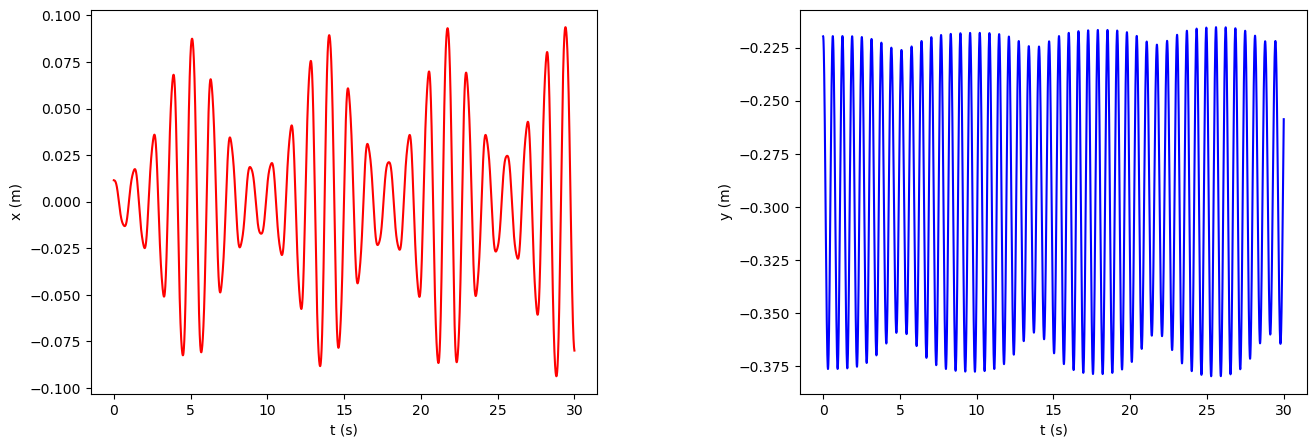

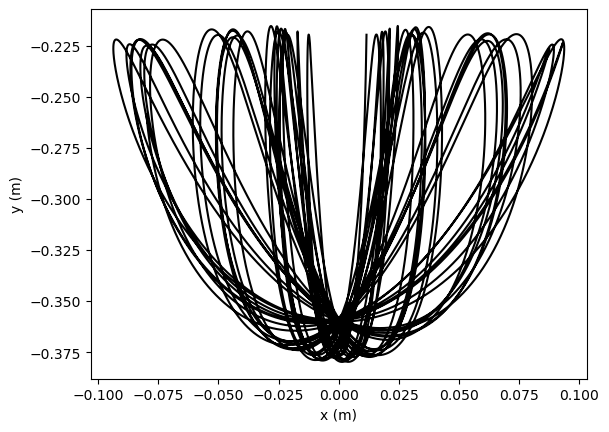

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# initiate the required variables / add additional ones if needed
# change the values if needed
N=300000         #replace this by the value you need for your problem
dt = 1e-4        #replace this by the value you need for your problem
m = 0.1          #replace this by the value you need for your problem
k = 1.e1         #replace this by the value you need for your problem
l0 = 0.2         #replace this by the value you need for your problem
g = 9.81         #replace this by the value you need for your problem

i=0
t = 0*np.linspace(0,N,N+1)
vx = 0*np.linspace(0,N,N+1)
x = 0*np.linspace(0,N,N+1)
vy = 0*np.linspace(0,N,N+1)
y = 0*np.linspace(0,N,N+1)
phi = 0*np.linspace(0,N,N+1)


# provide the initial conditions
phi0 = np.pi/60.0
dl = 0.02

x0 = (l0+dl)*np.sin(phi0)     #replace this by the actual initial condition
vx0 = 0                       #replace this by the actual initial condition
y0 = -(l0+dl)*np.cos(phi0)    #replace this by the actual initial condition
vy0 = 0                       #replace this by the actual initial condition
x[0]=x0
vx[0]=vx0
y[0]=y0
vy[0]=vy0
phi[0] = phi0

#define the function F/m
def forcex(x, y, phi):
    l = np.sqrt(x*x+y*y)
    forcex = -k*(l-l0)*np.sin(phi)      #replace this line with the actual F - expression
    return forcex

def forcey(x, y, phi):
    l = np.sqrt(x*x+y*y)
    forcey = k*(l-l0)*np.cos(phi) - m*g     #replace this line with the actual F - expression
    return forcey

#compute the trajectory and velocity
while i < N:
    t[i+1] = (i+1)*dt
    vx[i+1] = vx[i] + forcex(x[i],y[i],phi[i])*dt/m
    x[i+1] = x[i] + (vx[i]+vx[i+1])*dt/2.0
    vy[i+1] = vy[i] + forcey(x[i],y[i],phi[i])*dt/m
    y[i+1] = y[i] + (vy[i]+vy[i+1])*dt/2.0
    phi[i+1] = np.arctan(x[i+1]/(-y[i+1]))
    i = i+1



# plot the results
plt.subplot(121)
plt.plot(t,x,'r-')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.subplot(122)
plt.plot(t,y,'b-')
plt.xlabel('t (s)')
plt.ylabel('y (m)')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# show the plots
plt.show()

plt.plot(x,y,'k-')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()